# Project 8 - Store Item Demand Forecasting


## Use ARIMA model to make prediction for a time series dataset

In [10]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')

## Evaluate ARIMA model

In [11]:
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

## Evaluate combinations of p, d, q values for an ARIMA model

In [12]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [13]:
#read in .csv data file
data_train = pd.read_csv("train.csv", parse_dates = ["date"], index_col = "date")

In [14]:
#explore this data set
print (data_train.head())
print ("\n Data Types:")
print (data_train.dtypes)
data_train.index

            store  item  sales
date                          
2013-01-01      1     1     13
2013-01-02      1     1     11
2013-01-03      1     1     14
2013-01-04      1     1     13
2013-01-05      1     1     10

 Data Types:
store    int64
item     int64
sales    int64
dtype: object


DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='date', length=913000, freq=None)

In [15]:
m = max(data_train["store"])
n = max(data_train["item"])
k = data_train.shape[0]
p = int(k/(m*n))


In [16]:
#slice by different store and item
ts_train = data_train.iloc[0:p, 2]

In [17]:
#Determing rolling statistics
rolmean = pd.Series.rolling(ts_train, window=12).mean()
rolstd = pd.Series.rolling(ts_train, window=12).std()

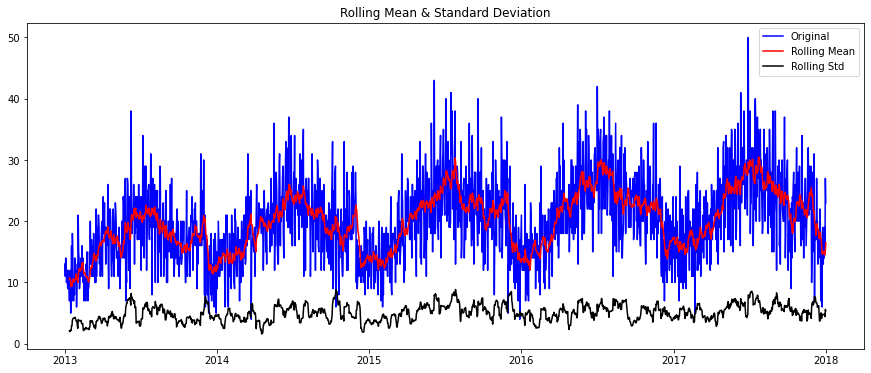

In [18]:
#Plot rolling statistics:
orig = plt.plot(ts_train, color="blue",label="Original")
mean = plt.plot(rolmean, color="red", label="Rolling Mean")
std = plt.plot(rolstd, color="black", label = "Rolling Std")
plt.legend(loc="best")
plt.title("Rolling Mean & Standard Deviation")
plt.show(block=False)

In [19]:
#Perform Dickey-Fuller test:
print ("Results of Dickey-Fuller Test:")
dftest = adfuller(ts_train, autolag="AIC")
dfoutput = pd.Series(dftest[0:4], index=["Test Statistic","p-value","#Lags Used","Number of Observations Used"])
for key,value in dftest[4].items():
    dfoutput["Critical Value (%s)"%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -3.157671
p-value                           0.022569
#Lags Used                       23.000000
Number of Observations Used    1802.000000
Critical Value (1%)              -3.433984
Critical Value (5%)              -2.863145
Critical Value (10%)             -2.567625
dtype: float64


In [20]:
warnings.filterwarnings("ignore")
evaluate_models(ts_train, [0,1,2], [0,1,2], [0,1,2])

ARIMA(0, 0, 0) MSE=56.839
ARIMA(0, 0, 1) MSE=47.259
ARIMA(0, 0, 2) MSE=44.434
ARIMA(0, 1, 0) MSE=56.953
ARIMA(0, 1, 1) MSE=33.494
ARIMA(0, 1, 2) MSE=33.271
ARIMA(0, 2, 0) MSE=160.777
ARIMA(0, 2, 1) MSE=57.037
ARIMA(1, 0, 0) MSE=42.989
ARIMA(1, 0, 1) MSE=33.448
ARIMA(1, 0, 2) MSE=33.227
ARIMA(1, 1, 0) MSE=47.350
ARIMA(1, 1, 1) MSE=33.304
ARIMA(1, 1, 2) MSE=33.340
ARIMA(1, 2, 0) MSE=98.535
ARIMA(2, 0, 0) MSE=40.958
ARIMA(2, 0, 1) MSE=33.259
ARIMA(2, 0, 2) MSE=33.333
ARIMA(2, 1, 0) MSE=43.586
ARIMA(2, 1, 1) MSE=33.090
ARIMA(2, 1, 2) MSE=32.591
ARIMA(2, 2, 0) MSE=79.613
Best ARIMA(2, 1, 2) MSE=32.591
